1. **IMPORTING PYTHON LIBRARIES AND THE DATASET**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataframe
df=pd.read_csv(r'file.csv',encoding='unicode_escape')

2. **PERFORMING BASIC EDA**

In [3]:
# Dsiplaying the number of rows and columns present in the dataframe respectively
df.shape

(8784, 8)

In [4]:
# Names of all the columns present in the dataframe
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [7]:
# Basic information about the dataframe df: rows , columns , types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Visibility_km     8784 non-null   float64
 4   Press_kPa         8784 non-null   float64
 5   Weather           8784 non-null   object 
 6   Wind Speed_km/h   8784 non-null   int64  
 7   Temp_C            8784 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
# First 5 records present in the dataframe df
df.head()

,Date/Time,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Weather,Wind Speed_km/h,Temp_C
0,1/1/2012 0:00,-3.9,86,8.0,101.24,Fog,4,-1.8
1,1/1/2012 1:00,-3.7,87,8.0,101.24,Fog,4,-1.8
2,1/1/2012 2:00,-3.4,89,4.0,101.26,"Freezing Drizzle,Fog",7,-1.8
3,1/1/2012 3:00,-3.2,88,4.0,101.27,"Freezing Drizzle,Fog",6,-1.5
4,1/1/2012 4:00,-3.3,88,4.8,101.23,Fog,7,-1.5


In [58]:
#Calculating the mean value of some important parameters in the dataframe df : TEMPERATURE , WIND SPEED , PRESSURE
df[['Temp_C','Wind Speed_km/h','Rel Hum_%']].mean()

Temp_C              8.798144
Wind Speed_km/h    14.945469
Rel Hum_%          67.431694
dtype: float64

In [9]:
#The weather type with the highest frequency in the dataframe df.
df['Weather'].mode()

0    Mainly Clear
Name: Weather, dtype: object

In [59]:
# Number of times the weather condition was 'CLEAR'
len(df[(df.Weather=='Clear')])

1326

In [10]:
#descriptive statistics for all columns in the DataFrame df, including both numerical and categorical data.
df.describe(include='all')

,Date/Time,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Weather,Wind Speed_km/h,Temp_C
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784,8784.000000,8784.000000
unique,8784,NaN,NaN,NaN,NaN,50,NaN,NaN
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,Mainly Clear,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,2106,NaN,NaN
mean,NaN,2.555294,67.431694,27.664447,101.051623,NaN,14.945469,8.798144
std,NaN,10.883072,16.918881,12.622688,0.844005,NaN,8.688696,11.687883
min,NaN,-28.500000,18.000000,0.200000,97.520000,NaN,0.000000,-23.300000
25%,NaN,-5.900000,56.000000,24.100000,100.560000,NaN,9.000000,0.100000
50%,NaN,3.300000,68.000000,25.000000,101.070000,NaN,13.000000,9.300000
75%,NaN,11.800000,81.000000,25.000000,101.590000,NaN,20.000000,18.800000


From above we can conclude that:
1.The mean temperature throught the dataset was 8.798144°C
2.The mean wind speed throught the dataset was  14.945469 km/hour
3.The mean relative humidity throught the dataset was 67.431694 %
4.The weather was 'mainly clear' maximun number of times.

3. **DATA PREPARATION**

In [11]:
# checking for any null values in the dataframe
df.isnull().sum()

Date/Time           0
Dew Point Temp_C    0
Rel Hum_%           0
Visibility_km       0
Press_kPa           0
Weather             0
Wind Speed_km/h     0
Temp_C              0
dtype: int64

In [12]:
# Changing the data type of 'Date/Time' column from object to datetime

df['Date/Time']=df['Date/Time'].astype('datetime64[s]')

In [13]:
# List of all weather conditions in the dataframe
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [63]:
#As we can see our dataframe is showing a vast majority of weather conditions but our focus will only be on the Major Weather conditions

# List of weather types to include
major_weather_types = ['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog', 'Thunderstorms', 'Haze' ,'Mostly Cloudy','Mainly Clear'


]

#Filter the DataFrame to include only the specified weather types into a new dataframe named 'df1'
df1 = df[df['Weather'].isin(major_weather_types)]

#while filtering out the dataframe the index value must also be corrected
df1.reset_index(drop=True, inplace=True)
df1.shape


(8093, 10)

4. **VISUALIZING KEY STATISTICS**

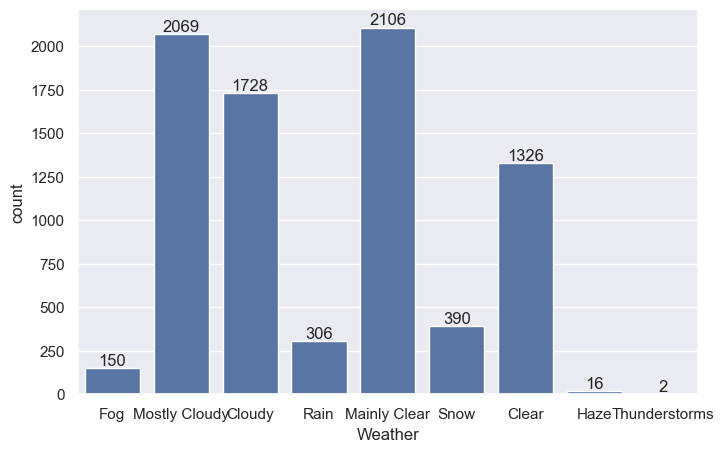

In [64]:
ax = sns.countplot(x='Weather', data=df1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#This shows the number of times each weather condition was observed in our dataframe df1
#Again we can see that for the majority of the times the weather condition was 'Mainly Clear'


Text(0, 0.5, 'Number of Days')

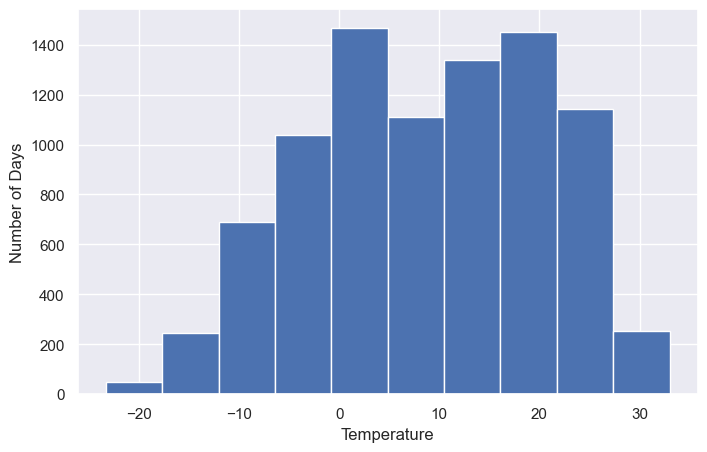

In [65]:
bx=plt.hist(df['Temp_C'])
plt.xlabel('Temperature')
plt.ylabel('Number of Days')

#This gives us an idea od the frequency of the temperature that was recored throughout the dataframe df
#We can see that for the majority of the days the recorded temperature was between 0°C to 5°C.


In [66]:
# Creating bins i.e creating a new column that categorizes the temperature dataset into on of the 3 categories

bins = np.linspace(min(df['Temp_C']), max(df['Temp_C']), 4)
temp_groups = ['Low', 'Medium', 'High']
df['Temp_Binned'] = pd.cut(df['Temp_C'], bins=bins, labels=temp_groups, include_lowest=True)

# Get the counts of each bin
temp_counts = df['Temp_Binned'].value_counts().reindex(temp_groups)




In [69]:
df['Temp_Binned'].unique()


['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

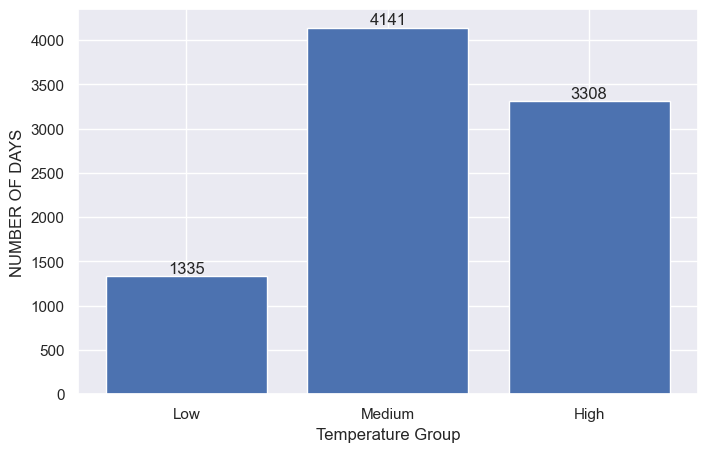

In [70]:
# Plot the bar chart for the binned temperature values observed in our dataframe df
plt.bar(temp_groups, temp_counts)

# Label the axes
plt.xlabel('Temperature Group')
plt.ylabel('NUMBER OF DAYS')

# Add labels to each bar
for i, count in enumerate(temp_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

#We can see that for the majority of the days the temperature was 'Moderate'

In [72]:
# Create bins for the Wind Speed data.

bins2 = np.linspace(min(df['Wind Speed_km/h']), max(df['Wind Speed_km/h']), 4)
wind_groups = ['Slow', 'Moderate', 'Fast']
df['Wind_Binned'] = pd.cut(df['Wind Speed_km/h'], bins=bins2, labels=wind_groups, include_lowest=True)
wind_counts = df['Wind_Binned'].value_counts().reindex(wind_groups)


In [73]:
df['Wind_Binned'].unique()

['Slow', 'Moderate', 'Fast']
Categories (3, object): ['Slow' < 'Moderate' < 'Fast']

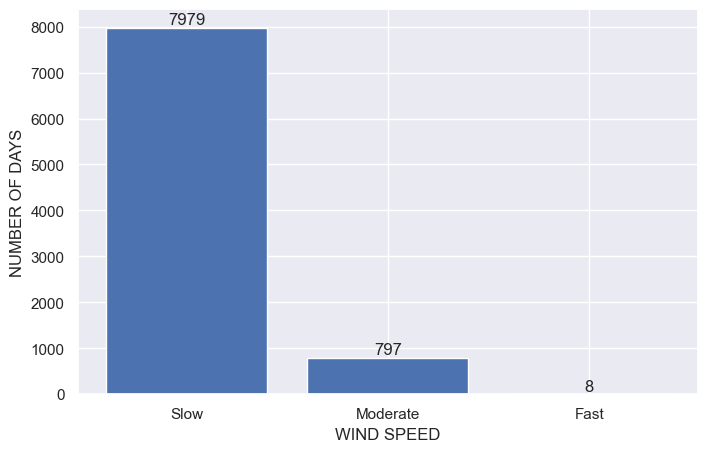

In [74]:
# Plot the bar chart
plt.bar(wind_groups, wind_counts)

plt.xlabel('WIND SPEED')
plt.ylabel('NUMBER OF DAYS')

for i, count in enumerate(wind_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

#Thus we can say that almost everyday the wind speed observed was 'Slow'.

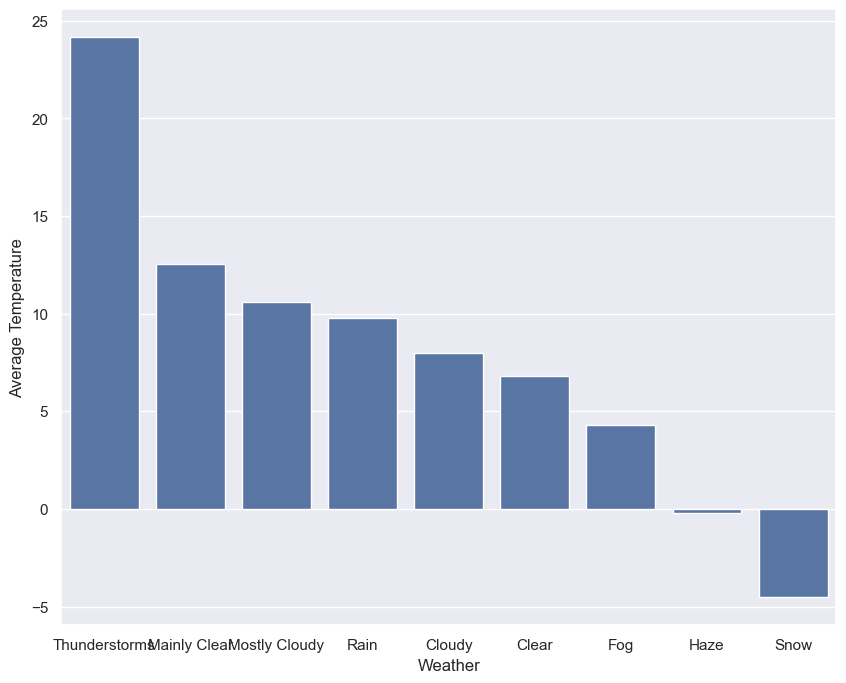

In [86]:
# Group the dataframe df1 on the basis of 'Weather' and find the mean temparature for each weather condition 
temp_weather = df1.groupby('Weather', as_index=False)['Temp_C'].mean().sort_values(by='Temp_C', ascending=False)

# Create the bar plot
sns.barplot(x='Weather', y='Temp_C', data=temp_weather)
sns.set(rc={'figure.figsize':(10,8)})

# Label the axes
plt.xlabel('Weather')
plt.ylabel('Average Temperature')


# Show the plot
plt.show()

##CONCLUSION
#we can conclude that Thunderstroms were accompanied with highest mean temperature will snowy days had the lowest mean temperature.


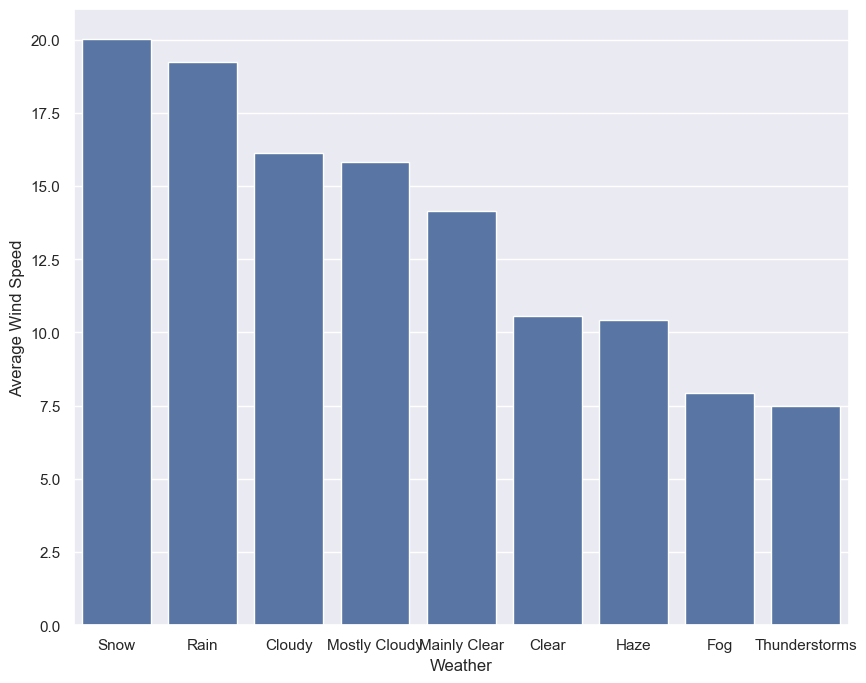

In [85]:
# Group the dataframe df1 on the basis of 'Weather' and find the mean Wind Speed for each weather condition 
temp_weather = df1.groupby('Weather', as_index=False)['Wind Speed_km/h'].mean().sort_values(by='Wind Speed_km/h', ascending=False)

# Create the bar plot
sns.barplot(x='Weather', y='Wind Speed_km/h', data=temp_weather)

# Label the axes
plt.xlabel('Weather')
plt.ylabel('Average Wind Speed')

# Show the plot
plt.show()

##CONCLUSION
#Snowy days had the highest mean wind speed while thunderstorms had the mowest mean wind speed

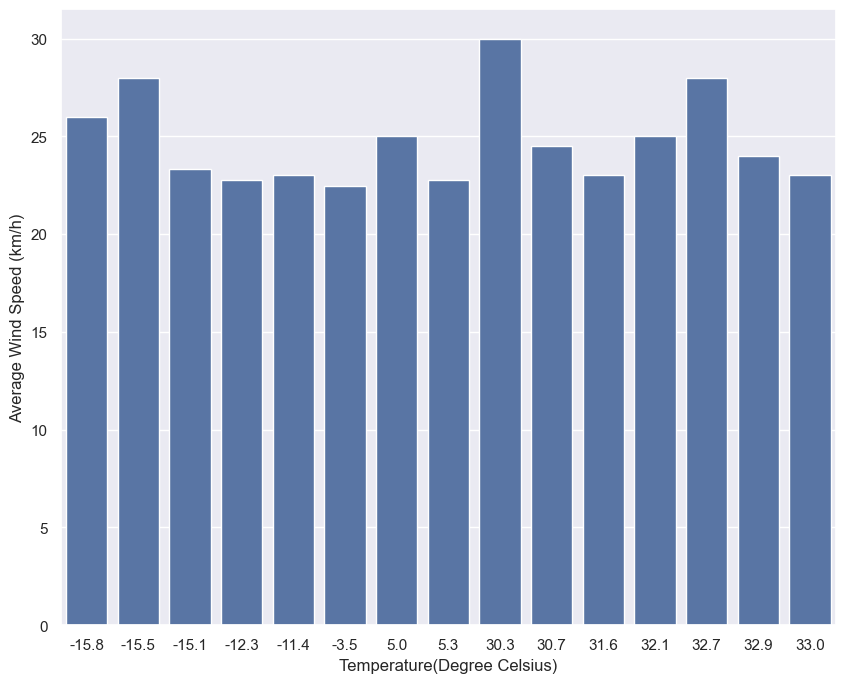

In [87]:
wind_temp=df.groupby(['Temp_C'],as_index=False)['Wind Speed_km/h'].mean().sort_values(by='Wind Speed_km/h',ascending=False).head(15)
sns.barplot(x='Temp_C',y='Wind Speed_km/h',data=wind_temp)

plt.xlabel('Temperature(Degree Celsius)')
plt.ylabel('Average Wind Speed (km/h)')
plt.show()

#It shows a relationship btw temparture and the associated average wind speed

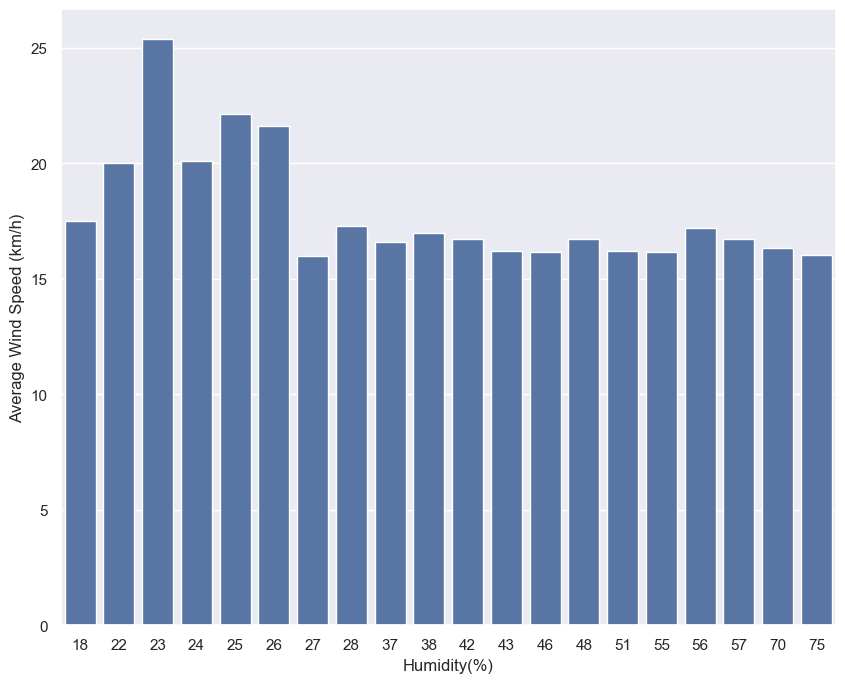

In [88]:
wind_humid=df.groupby(['Rel Hum_%'],as_index=False)['Wind Speed_km/h'].mean().sort_values(by='Wind Speed_km/h',ascending=False).head(20)
sns.barplot(x='Rel Hum_%',y='Wind Speed_km/h',data=wind_humid)
plt.xlabel('Humidity(%)')
plt.ylabel('Average Wind Speed (km/h)')
plt.show()

#It shows the relationship bwteen the humidity and the average wind speed

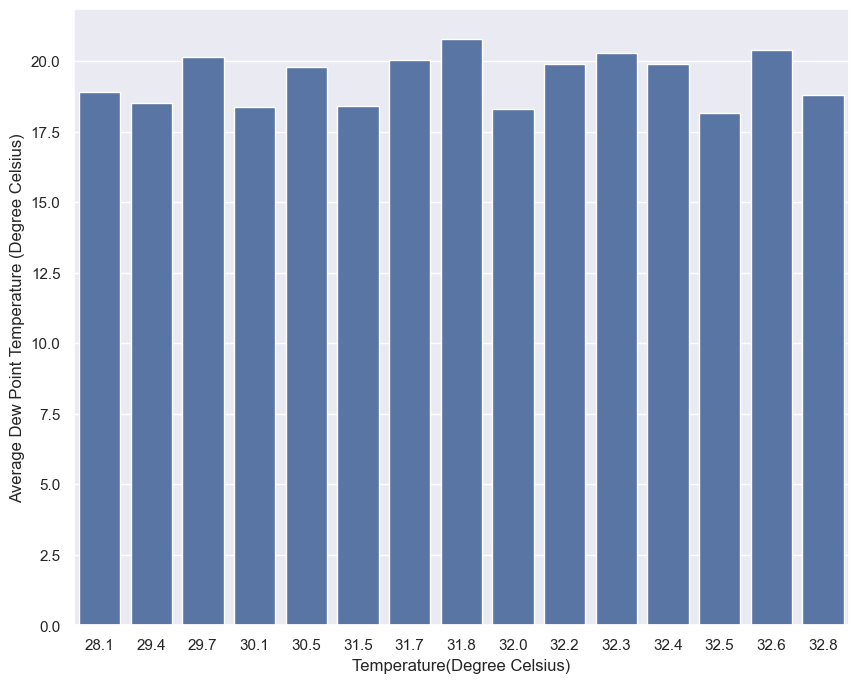

In [89]:
dewtemp_temp=df.groupby(['Temp_C'],as_index=False)['Dew Point Temp_C'].mean().sort_values(by='Dew Point Temp_C',ascending=False).head(15)
sns.barplot(x='Temp_C',y='Dew Point Temp_C',data=dewtemp_temp)
plt.xlabel('Temperature(Degree Celsius)')
plt.ylabel('Average Dew Point Temperature (Degree Celsius)')
plt.show()

In [90]:
#First we filter out our dataframe df into more precise dataframe 'd2'

weather_types = ['Clear', 'Rain', 'Snow', 'Thunderstorms']
df2 = df[df['Weather'].isin(weather_types)]
df2.reset_index(drop=True, inplace=True)

In [91]:
df2.shape

(2024, 10)

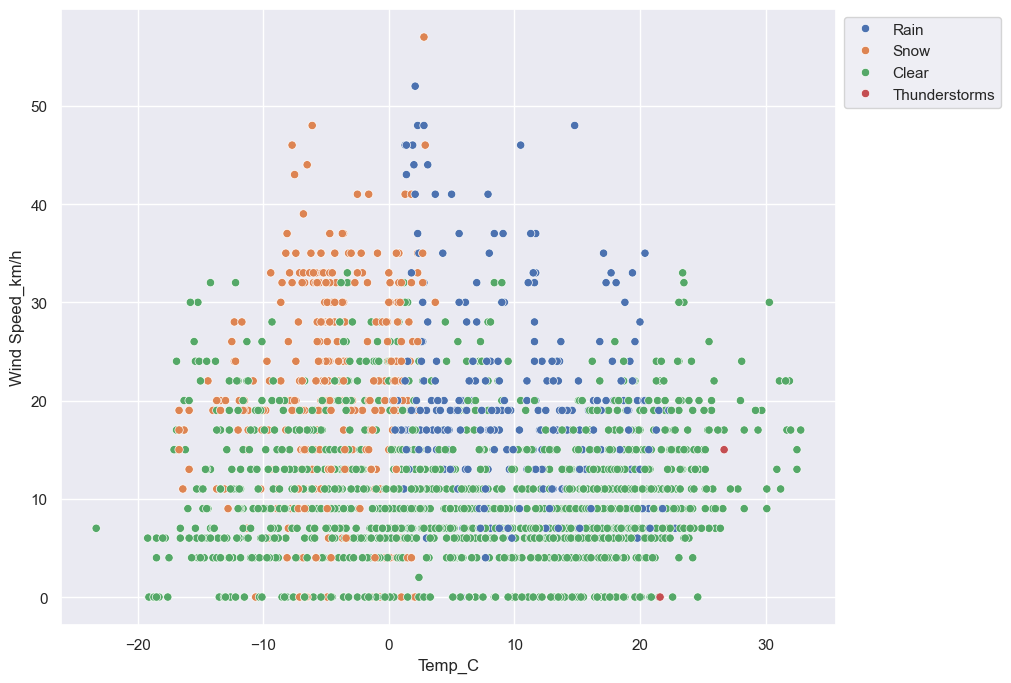

In [93]:
#To show a relationship btw temperature and wind speed for each Weather type as described in df2
sns.scatterplot(x='Temp_C', y='Wind Speed_km/h', 
                hue='Weather', data=df2 ) 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

##CONCLUSION 
#We can clearly see that for the majority of the days the weather condition was 'Clear' 
#and the observed temparture was within the range of 10°C to 20°C for 'Clear' days with a wind speed ranging from 0 to 10 km/h

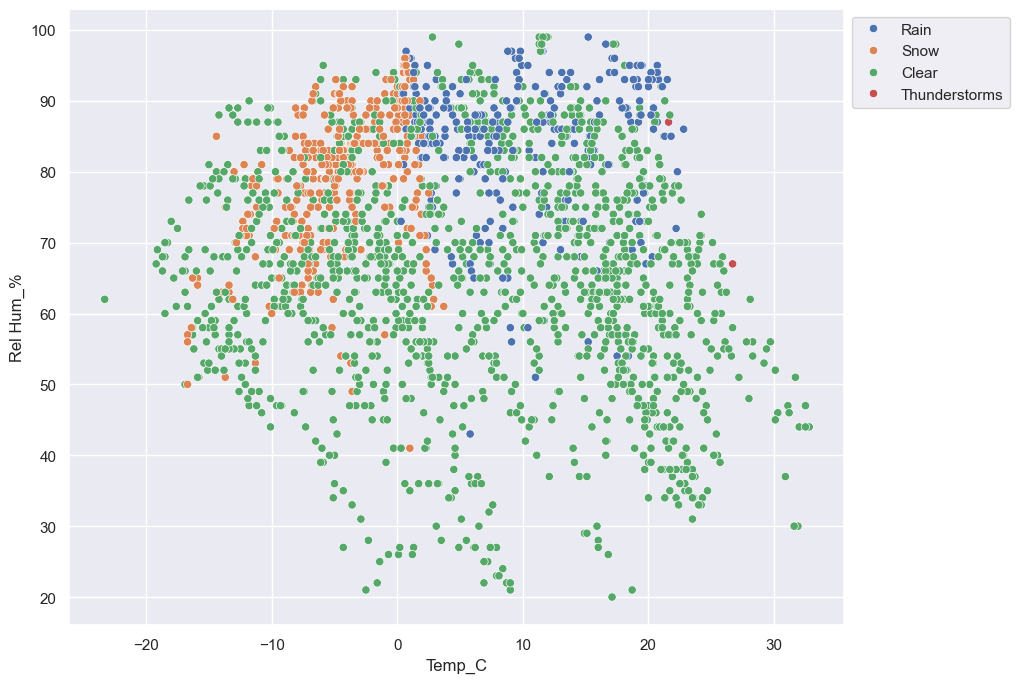

In [94]:
sns.scatterplot(x='Temp_C', y='Rel Hum_%', 
                hue='Weather', data=df2, ) 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

5. **CORRELATION ANALYSIS**

In [95]:
df.columns

Index(['Date/Time', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km',
       'Press_kPa', 'Weather', 'Wind Speed_km/h', 'Wind_Binned', 'Temp_C',
       'Temp_Binned'],
      dtype='object')

In [96]:
df=df[['Date/Time', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km',
       'Press_kPa', 'Weather', 'Wind Speed_km/h', 'Wind_Binned', 'Temp_C', 'Temp_Binned'
      ]]

In [97]:
df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr(method='pearson')

#We can see the relationship of each variable with one another and that how do they vary accordingly

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


<Axes: >

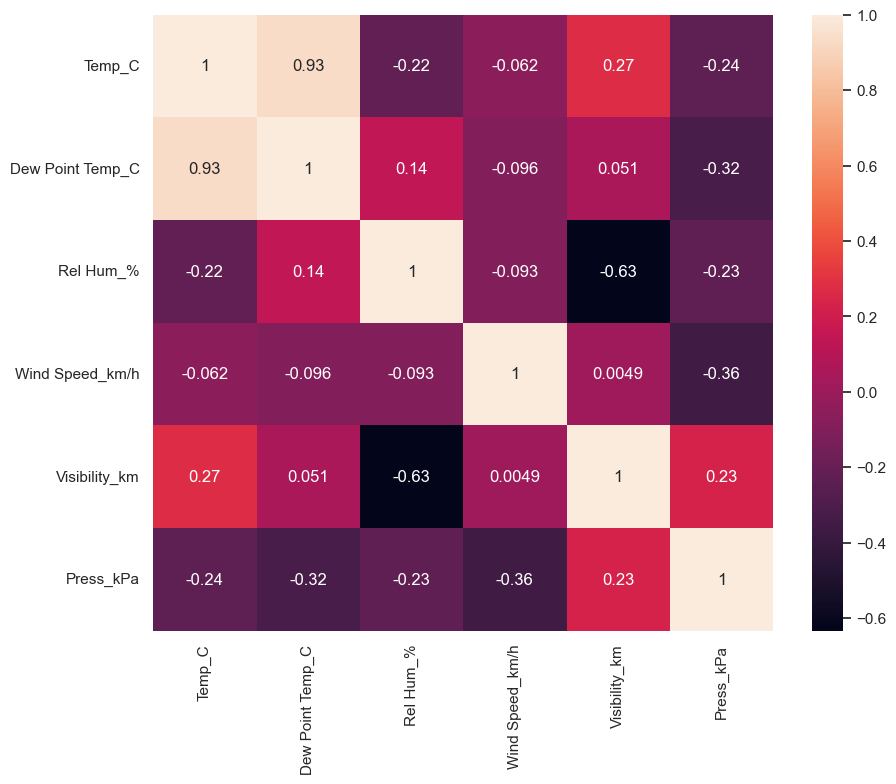

In [98]:
sns.heatmap(df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr(method='pearson'),annot=True)

#CONCLUSION
#Strong Positive Correlation Between Temp_C and Dew Point Temp_C.
#This suggests that as the temperature increases, the dew point temperature also tends to increase, and vice versa.
#Strong Negative Correlation btw humidity and visibility . Higher relative humidity is associated with significantly lower visibility.

6. **REGRESSION ANALYSIS**

In [120]:
# Create bins for the dataframe df1


bins = np.linspace(min(df['Temp_C']), max(df1['Temp_C']), 4)

temp_groups1 = ['Low', 'Medium', 'High']

df1['Temp_Binned'] = pd.cut(df1['Temp_C'], bins=bins, labels=temp_groups1, include_lowest=True)

temp_counts = df1['Temp_Binned'].value_counts().reindex(temp_groups1)

bins2 = np.linspace(min(df1['Wind Speed_km/h']), max(df['Wind Speed_km/h']), 4)

wind_groups1 = ['Slow', 'Moderate', 'Fast']

df1['Wind_Binned'] = pd.cut(df1['Wind Speed_km/h'], bins=bins2, labels=wind_groups1, include_lowest=True)

wind_counts = df['Wind_Binned'].value_counts().reindex(wind_groups1)


In [121]:
df1.head()

,Date/Time,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Weather,Wind Speed_km/h,Wind_Binned,Temp_C,Temp_Binned
0,2012-01-01 00:00:00,-3.9,86,8.0,101.24,Fog,4,Slow,-1.8,Medium
1,2012-01-01 01:00:00,-3.7,87,8.0,101.24,Fog,4,Slow,-1.8,Medium
2,2012-01-01 04:00:00,-3.3,88,4.8,101.23,Fog,7,Slow,-1.5,Medium
3,2012-01-01 05:00:00,-3.3,87,6.4,101.27,Fog,9,Slow,-1.4,Medium
4,2012-01-01 06:00:00,-3.1,89,6.4,101.29,Fog,7,Slow,-1.5,Medium


In [122]:
df1['Weather'].unique()

array(['Fog', 'Mostly Cloudy', 'Cloudy', 'Rain', 'Mainly Clear', 'Snow',
       'Clear', 'Haze', 'Thunderstorms'], dtype=object)

In [123]:
#Regression can only be done on  numerical dataset thus we perform 'HOT ONE ENCODING' to convert the object datatype to boolean datatype.

Weather_dummy=pd.get_dummies(df1['Weather'])
Weather_dummy

,Clear,Cloudy,Fog,Haze,Mainly Clear,Mostly Cloudy,Rain,Snow,Thunderstorms
0,False,False,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8088,False,False,False,False,False,False,False,True,False
8089,False,False,False,False,False,False,False,True,False
8090,False,False,False,False,False,False,False,True,False
8091,False,False,False,False,False,False,False,True,False


In [124]:
#COMBINING THE NEWLY CREATED BOOLEAN WEATHER COLUMNS TO THE ORIGINAL DATAFRAME DF1
dataframe=pd.concat([df1,Weather_dummy],axis=1)

In [125]:
dataframe.head()

,Date/Time,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Weather,Wind Speed_km/h,Wind_Binned,Temp_C,Temp_Binned,Clear,Cloudy,Fog,Haze,Mainly Clear,Mostly Cloudy,Rain,Snow,Thunderstorms
0,2012-01-01 00:00:00,-3.9,86,8.0,101.24,Fog,4,Slow,-1.8,Medium,False,False,True,False,False,False,False,False,False
1,2012-01-01 01:00:00,-3.7,87,8.0,101.24,Fog,4,Slow,-1.8,Medium,False,False,True,False,False,False,False,False,False
2,2012-01-01 04:00:00,-3.3,88,4.8,101.23,Fog,7,Slow,-1.5,Medium,False,False,True,False,False,False,False,False,False
3,2012-01-01 05:00:00,-3.3,87,6.4,101.27,Fog,9,Slow,-1.4,Medium,False,False,True,False,False,False,False,False,False
4,2012-01-01 06:00:00,-3.1,89,6.4,101.29,Fog,7,Slow,-1.5,Medium,False,False,True,False,False,False,False,False,False


In [126]:
#As stated earlier Regression can only be done on  numerical dataset thus we perform 'LABEL ENCODING' to convert the object datatype to boolean datatype.

dataframe['Temp_Binned_Encoded'] = pd.factorize(dataframe['Temp_Binned'])[0]
dataframe['Wind_Binned_Encoded'] = pd.factorize(dataframe['Wind_Binned'])[0]
dataframe.head()

,Date/Time,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Weather,Wind Speed_km/h,Wind_Binned,Temp_C,Temp_Binned,...,Cloudy,Fog,Haze,Mainly Clear,Mostly Cloudy,Rain,Snow,Thunderstorms,Temp_Binned_Encoded,Wind_Binned_Encoded
0,2012-01-01 00:00:00,-3.9,86,8.0,101.24,Fog,4,Slow,-1.8,Medium,...,False,True,False,False,False,False,False,False,0,0
1,2012-01-01 01:00:00,-3.7,87,8.0,101.24,Fog,4,Slow,-1.8,Medium,...,False,True,False,False,False,False,False,False,0,0
2,2012-01-01 04:00:00,-3.3,88,4.8,101.23,Fog,7,Slow,-1.5,Medium,...,False,True,False,False,False,False,False,False,0,0
3,2012-01-01 05:00:00,-3.3,87,6.4,101.27,Fog,9,Slow,-1.4,Medium,...,False,True,False,False,False,False,False,False,0,0
4,2012-01-01 06:00:00,-3.1,89,6.4,101.29,Fog,7,Slow,-1.5,Medium,...,False,True,False,False,False,False,False,False,0,0


In [127]:
dataframe.drop('Weather',axis=1,inplace=True)
dataframe.drop('Temp_Binned',axis=1,inplace=True)
dataframe.drop('Wind_Binned',axis=1,inplace=True)


In [128]:
dataframe.head()

,Date/Time,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h,Temp_C,Clear,Cloudy,Fog,Haze,Mainly Clear,Mostly Cloudy,Rain,Snow,Thunderstorms,Temp_Binned_Encoded,Wind_Binned_Encoded
0,2012-01-01 00:00:00,-3.9,86,8.0,101.24,4,-1.8,False,False,True,False,False,False,False,False,False,0,0
1,2012-01-01 01:00:00,-3.7,87,8.0,101.24,4,-1.8,False,False,True,False,False,False,False,False,False,0,0
2,2012-01-01 04:00:00,-3.3,88,4.8,101.23,7,-1.5,False,False,True,False,False,False,False,False,False,0,0
3,2012-01-01 05:00:00,-3.3,87,6.4,101.27,9,-1.4,False,False,True,False,False,False,False,False,False,0,0
4,2012-01-01 06:00:00,-3.1,89,6.4,101.29,7,-1.5,False,False,True,False,False,False,False,False,False,0,0


In [129]:
dataframe.columns

Index(['Date/Time', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km',
       'Press_kPa', 'Wind Speed_km/h', 'Temp_C', 'Clear', 'Cloudy', 'Fog',
       'Haze', 'Mainly Clear', 'Mostly Cloudy', 'Rain', 'Snow',
       'Thunderstorms', 'Temp_Binned_Encoded', 'Wind_Binned_Encoded'],
      dtype='object')

In [130]:
dataframe=dataframe[[ 'Date/Time','Clear', 'Cloudy', 'Fog',
       'Haze', 'Rain', 'Snow', 'Thunderstorms', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km',
       'Press_kPa',  
       'Wind Speed_km/h','Wind_Binned_Encoded', 'Temp_Binned_Encoded','Temp_C']]

7. **DIVIDING INTO TARGET AND PREDICTOR VALUE**

In [131]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8093 entries, 0 to 8092
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   Date/Time            8093 non-null   datetime64[s]
 1   Clear                8093 non-null   bool         
 2   Cloudy               8093 non-null   bool         
 3   Fog                  8093 non-null   bool         
 4   Haze                 8093 non-null   bool         
 5   Rain                 8093 non-null   bool         
 6   Snow                 8093 non-null   bool         
 7   Thunderstorms        8093 non-null   bool         
 8   Dew Point Temp_C     8093 non-null   float64      
 9   Rel Hum_%            8093 non-null   int64        
 10  Visibility_km        8093 non-null   float64      
 11  Press_kPa            8093 non-null   float64      
 12  Wind Speed_km/h      8093 non-null   int64        
 13  Wind_Binned_Encoded  8093 non-null   int64      

In [132]:
#predictor value
X=dataframe.iloc[:,1:15]

#target value
y=dataframe.iloc[:,-1:]


In [133]:
from sklearn.model_selection import train_test_split

In [111]:
X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=102)

In [134]:
dataframe.head()

,Date/Time,Clear,Cloudy,Fog,Haze,Rain,Snow,Thunderstorms,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h,Wind_Binned_Encoded,Temp_Binned_Encoded,Temp_C
0,2012-01-01 00:00:00,False,False,True,False,False,False,False,-3.9,86,8.0,101.24,4,0,0,-1.8
1,2012-01-01 01:00:00,False,False,True,False,False,False,False,-3.7,87,8.0,101.24,4,0,0,-1.8
2,2012-01-01 04:00:00,False,False,True,False,False,False,False,-3.3,88,4.8,101.23,7,0,0,-1.5
3,2012-01-01 05:00:00,False,False,True,False,False,False,False,-3.3,87,6.4,101.27,9,0,0,-1.4
4,2012-01-01 06:00:00,False,False,True,False,False,False,False,-3.1,89,6.4,101.29,7,0,0,-1.5


In [135]:
#Perform feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train.iloc[:,-2:]=ss.fit_transform(X_train.iloc[:,-2:])


Mean Squared Error: 28512.10821762806
R-squared: -201.28265248254266


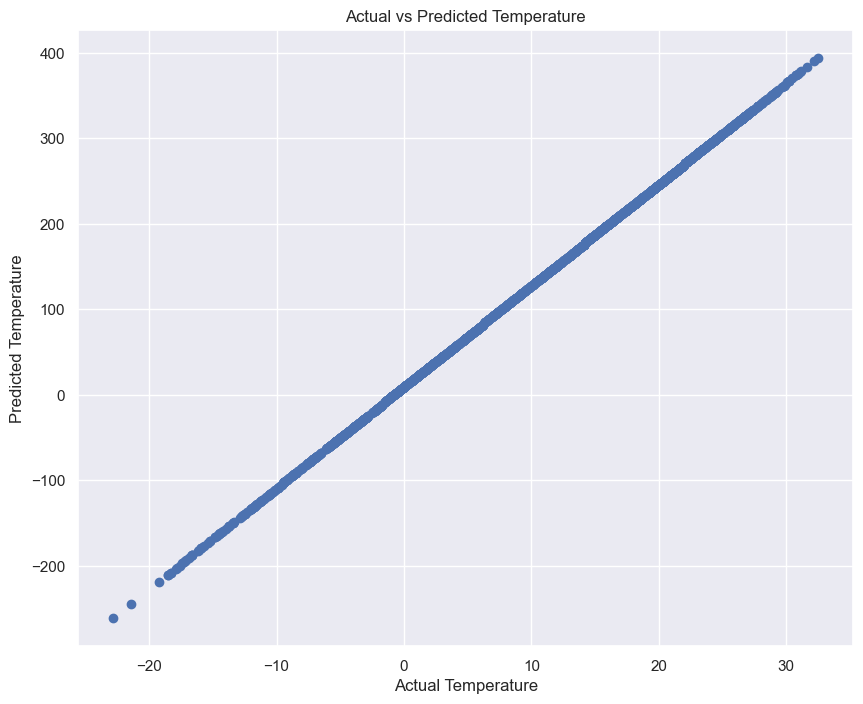

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Choose a regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()
